# FRED data

## A.1 Libraries

In [1]:
from fredapi import Fred
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
idx = pd.IndexSlice

## A.2 API Key

In [2]:
api_file = open('api_key.txt')
api_code = "".join(api_file.readlines())
fred = Fred(api_key=api_code)

## A.3 Functions

In [3]:
def calc_yoy(df):
    df = df.pct_change(12).multiply(100).dropna()
    return df

# 1. Employment

## 1.1 Total nonfarm
### 1.1.1 National
- Thousands of Persons,
- Seasonally Adjusted

In [9]:
df_tnf = fred.get_series('PAYEMS')
df_tnf = df_tnf.divide(1000)
df_tnf.tail(3)

2021-11-01    148.652
2021-12-01    149.162
2022-01-01    149.629
dtype: float64

#### 3.1.1.1 Quarterly change

In [5]:
def quart_raw(df, top_num):
    df = df.diff(1).dropna()
    df = df.sort_values(ascending=True)
    df = df.head(top_num)
    df.index = df.index.strftime('%Y-%m')
    return df
fig_tnf_bar = quart_raw(df_tnf, 5)
fig_tnf_bar

2020-04   -20.493
1945-09    -1.959
2020-03    -1.498
1949-10    -0.838
2009-03    -0.800
dtype: float64

#### 3.1.1.2 Compare to 2007

<AxesSubplot:>

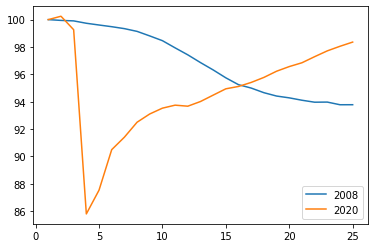

In [10]:
def compare(df, num_periods):
    df_2008 = df.loc['2008':].head(num_periods)
    df_2008 = df_2008.transform(lambda x: x/x[0]).multiply(100)
    df_2008.index = range(1, len(df_2008)+1)
    df_2020 = df.loc['2020':].head(num_periods)
    df_2020 = df_2020.transform(lambda x: x/x[0]).multiply(100)
    df_2020.index = range(1, len(df_2020)+1)
    df = pd.concat([df_2008, df_2020], axis=1).dropna()
    df.columns = ['2008', '2020']
    return df
    
compare(df_tnf, 48).plot()

### 1.1.2 All Employees: Total Nonfarm in California

In [11]:
df_tnf_ca = fred.get_series('PAYEMS')
df_tnf_ca.tail(3)

2021-11-01    148652.0
2021-12-01    149162.0
2022-01-01    149629.0
dtype: float64

# 2. JOLTS

## 2.1 Openings

In [12]:
jolts_open = fred.get_series('JTSJOL')
jolts_open.tail(2)

2021-11-01    10775.0
2021-12-01    10925.0
dtype: float64

## 2.2 Hires

In [13]:
jolts_hire = fred.get_series('JTSHIL')
jolts_hire.tail(2)

2021-11-01    6596.0
2021-12-01    6263.0
dtype: float64